# Flexion mono axiale 

vérification

In [3]:
import math

# Base de données pour les types de bois
parametres_bois = {
    "C16": {"f_mk": 16.0, "E_0_05": 5400, "E_0_mean": 11000},
    "C24": {"f_mk": 24.0, "E_0_05": 7000, "E_0_mean": 11000},
    "C30": {"f_mk": 30.0, "E_0_05": 8000, "E_0_mean": 12000},
    "D30": {"f_mk": 30.0, "E_0_05": 8000, "E_0_mean": 12000},
    "GL20h": {"f_mk": 20.0, "E_0_05": 7000, "E_0_mean": 11000},
    "GL24h": {"f_mk": 24.0, "E_0_05": 9100, "E_0_mean": 11500},
    "GL24c": {"f_mk": 24.0, "E_0_05": 9100, "E_0_mean": 11500},
    "GL28h": {"f_mk": 28.0, "E_0_05": 10500, "E_0_mean": 14200},
    "GL28c": {"f_mk": 28.0, "E_0_05": 10500, "E_0_mean": 14200},
    "GL32h": {"f_mk": 32.0, "E_0_05": 11200, "E_0_mean": 15400},
    "GL32c": {"f_mk": 32.0, "E_0_05": 11200, "E_0_mean": 15400}
}

def calcul_flexion_monoaxiale(moment_flechissant_Nm, largeur, hauteur, type_bois, classe_humidite, duree_application, ksys=1.0, gamma_M=1.3):
    """
    Calcule la vérification à la flexion monoaxiale selon les formules SIA 265.

    Arguments :
    - moment_flechissant_Nm : Moment fléchissant My,Ed (Nm)
    - largeur : Largeur de la section (b, mm)
    - hauteur : Hauteur de la section (h, mm)
    - type_bois : Classe du bois (ex: "C24", "GL28h")
    - classe_humidite : Classe d'humidité (1, 2 ou 3)
    - duree_application : Durée d'application de la charge ("infinie", "choc")
    - ksys : Coefficient d'effet système
    - gamma_M : Coefficient partiel de sécurité

    Retourne :
    - Vrai si la vérification est respectée, Faux sinon.
    """
    # Convertir le moment en Nmm
    moment_flechissant = moment_flechissant_Nm * 1e3  # Conversion de Nm à Nmm

    # Paramètres du bois
    f_mk = parametres_bois[type_bois]["f_mk"]  # Résistance caractéristique à la flexion
    E_0_05 = parametres_bois[type_bois]["E_0_05"]  # Module d'élasticité caractéristique

    # Facteur modifiant en fonction de la durée d'application de la charge (mod)
    eta_t = {"infinie": 1.0, "choc": 1.4}.get(duree_application, 1.0)
    # Facteur modifiant en fonction de la classe d'humidité (eta_w)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)

    # Moment de résistance W_y
    W_y = (largeur * hauteur**2) / 6  # en mm3
    sigma_myd = moment_flechissant / W_y  # Contrainte de flexion en N/mm2

    # Calcul de la résistance à la flexion f_md avec les facteurs eta_t, eta_w et ksys
    f_md = (f_mk * eta_t * eta_w * ksys) / gamma_M  # f_md = f_mk modifié par les coefficients

    # Vérification
    verif = sigma_myd <= f_md

    # Affichage des résultats
    print("\n=== Résultats de la Vérification à la Flexion ===")
    print(f"Classe du bois : {type_bois}")
    print(f"Classe d'humidité : {classe_humidite}")
    print(f"Durée d'application : {duree_application}")
    print(f"Coefficient d'effet système (k_sys) : {ksys}")
    print(f"Coefficient partiel de sécurité (γ_M) : {gamma_M}")
    print(f"Moment fléchissant (My,Ed) : {moment_flechissant_Nm:.2f} Nm")
    print(f"Largeur de la section : {largeur} mm")
    print(f"Hauteur de la section : {hauteur} mm")
    print(f"W_y (Module de résistance) : {W_y:.2f} mm3")
    print(f"Contrainte de flexion (sigma_myd) : {sigma_myd:.2f} N/mm2")
    print(f"Résistance corrigée (f_md) : {f_md:.2f} N/mm2")
    print(f"Vérification respectée : {'OUI' if verif else 'NON'}")

    return verif

# Exemple d'utilisation
type_bois = "C24"
moment_flechissant = 150  # Nm
largeur = 100  # Largeur de la section en mm
hauteur = 300  # Hauteur de la section en mm
classe_humidite = 1  # Classe 1
duree_application = "infinie"  # Durée d'application de la charge
ksys = 1.0  # Coefficient d'effet système
gamma_M = 1.3  # Coefficient partiel de sécurité

# Calcul
resultat = calcul_flexion_monoaxiale(moment_flechissant, largeur, hauteur, type_bois, classe_humidite, duree_application, ksys, gamma_M)

if resultat:
    print("\nLa section respecte la vérification à la flexion.")
else:
    print("\nATTENTION : La section ne respecte PAS la vérification à la flexion.")


=== Résultats de la Vérification à la Flexion ===
Classe du bois : C24
Classe d'humidité : 1
Durée d'application : infinie
Coefficient d'effet système (k_sys) : 1.0
Coefficient partiel de sécurité (γ_M) : 1.3
Moment fléchissant (My,Ed) : 150.00 Nm
Largeur de la section : 100 mm
Hauteur de la section : 300 mm
W_y (Module de résistance) : 1500000.00 mm3
Contrainte de flexion (sigma_myd) : 0.10 N/mm2
Résistance corrigée (f_md) : 18.46 N/mm2
Vérification respectée : OUI

La section respecte la vérification à la flexion.


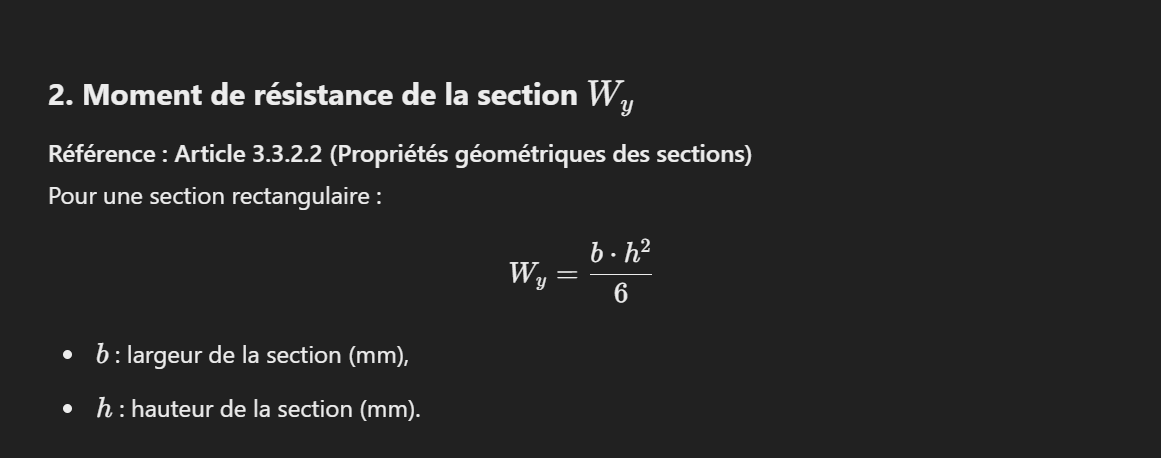
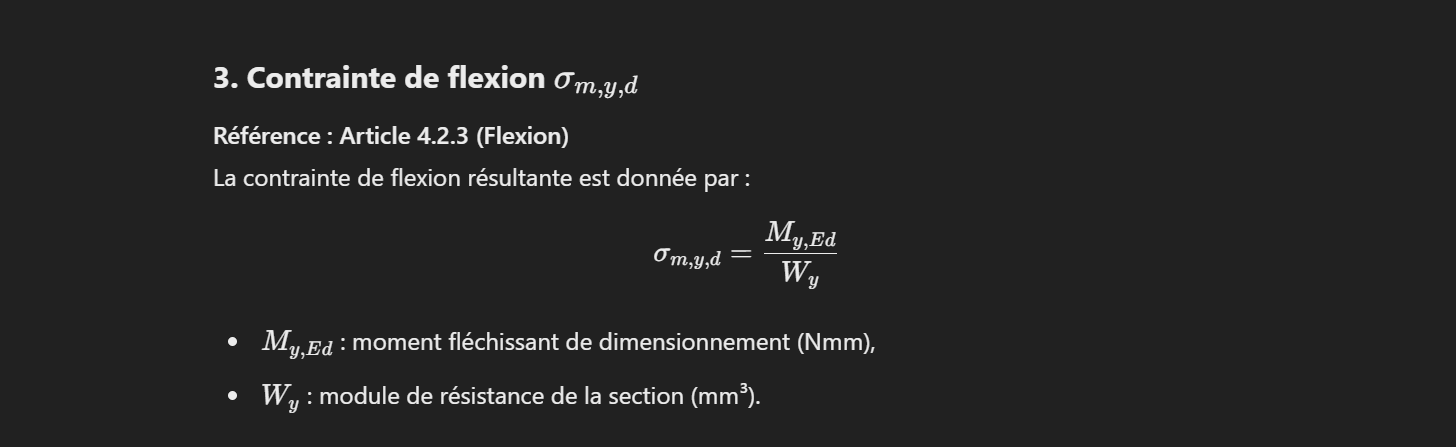
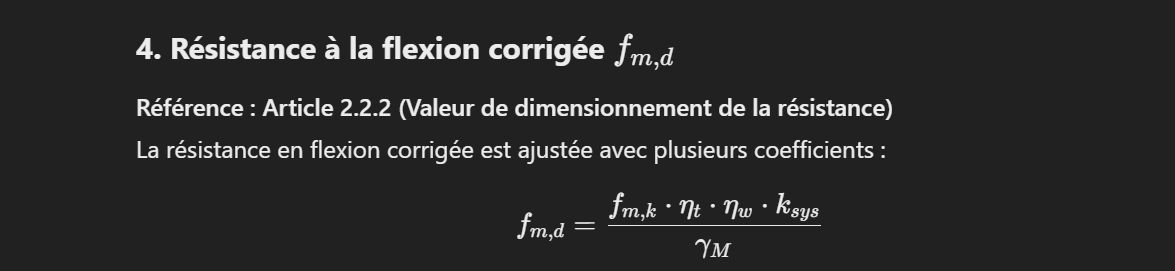
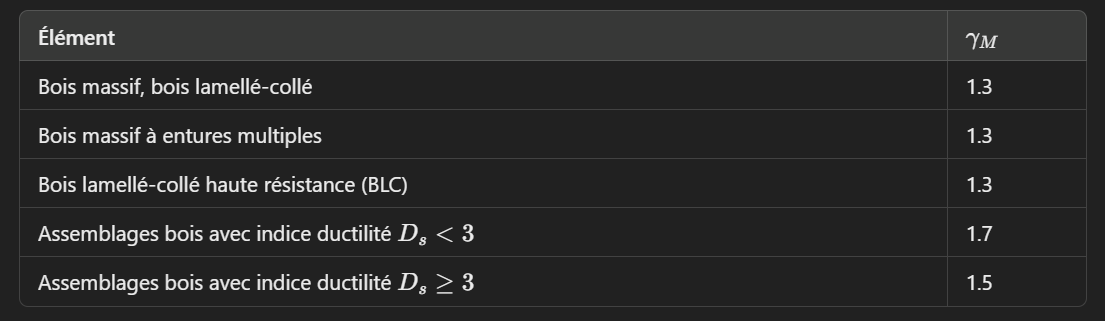
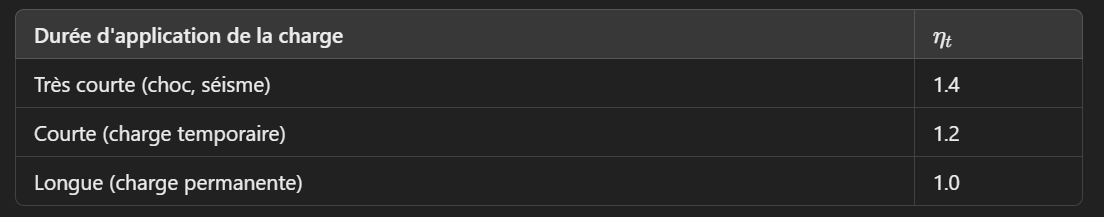
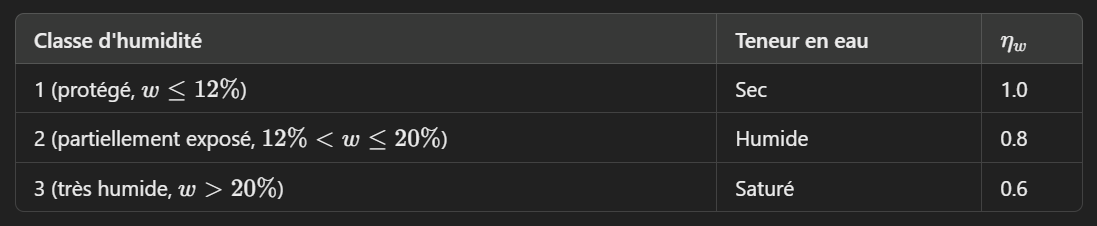
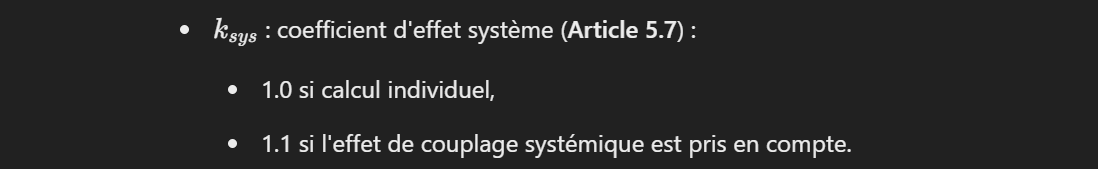
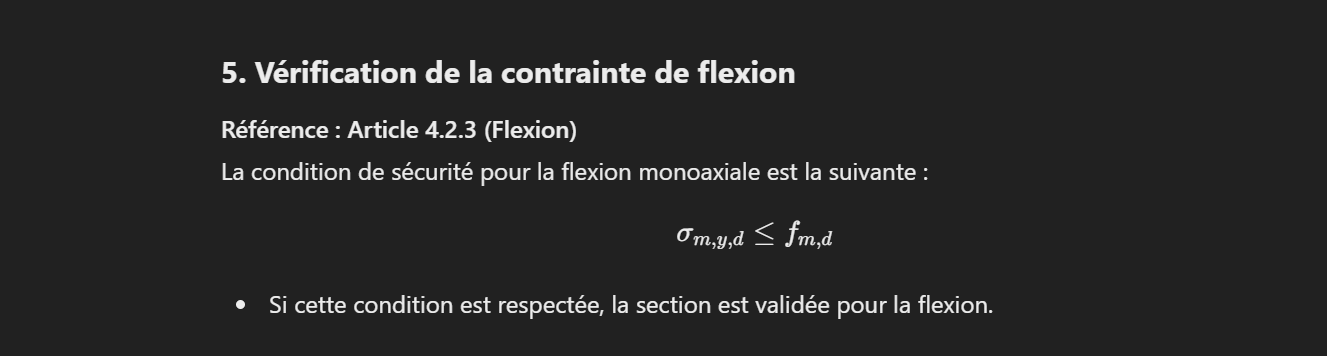
